In [181]:
from typing import TypedDict, Union
from langgraph.graph import StateGraph, START, END

In [182]:
class AgentState(TypedDict):
    num1 : int 
    num2 : int
    operation1 : str
    operation2 : Union[str, None]
    finalNum : int

In [183]:
def Adder(state: AgentState) -> AgentState:
    """ this function addes two number"""
    state['finalNum'] = state['num1'] + state['num2']
    state['operation1']
    return state

def Subtracter(state: AgentState) -> AgentState:
    """ this function subtract two number"""
    state['finalNum'] = state['num1'] - state['num2']
    state['operation1']
    return state

def multypler(state: AgentState) -> AgentState:
    """ this function multiply two number"""
    state['finalNum'] = state['num1'] * state['num2']
    state['operation1']
    return state

def divider(state: AgentState) -> AgentState:
    """ this function divides two number"""
    if(state['num1']>state['num2']):
        state['finalNum'] = state['num1'] / state['num2']
    else:
        state['finalNum'] = state['num2'] / state['num1']
    return state


In [184]:
def Adder1(state: AgentState) -> AgentState:
    """ this function addes two number"""
    state['finalNum'] = state['num1'] + state['num2']
    return state

def Subtracter1(state: AgentState) -> AgentState:
    """ this function subtract two number"""
    state['finalNum'] = state['num1'] - state['num2']
    return state

def multypler1(state: AgentState) -> AgentState:
    """ this function multiply two number"""
    state['finalNum'] = state['num1'] * state['num2']
    return state

def divider1(state: AgentState) -> AgentState:
    """ this function divides two number"""
    if(state['num1']>state['num2']):
        state['finalNum'] = state['num1'] / state['num2']
    else:
        state['finalNum'] = state['num2'] / state['num1']
    return state

In [185]:
def decide_first_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state['operation1'] == "+":
        return "addition_operation"
    
    if state['operation1'] == "-":
        return "subtraction_operation"
    
    if state['operation1'] == "*":
        return "multiply_operation"
    
    if state['operation1'] == "/":
        return "divide_operation"
    
def decide_seond_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state['operation2'] == "+":
        return "addition_operation"
    
    if state['operation2'] == "-":
        return "subtraction_operation"
    
    if state['operation2'] == "*":
        return "multiply_operation"
    
    if state['operation2'] == ".":
        return "divide_operation"
    return "end"

In [186]:
graph_builder = StateGraph(AgentState)

In [187]:
graph_builder.add_node("Addition_node", Adder)
graph_builder.add_node("Addition_node1", Adder1)
graph_builder.add_node("subtraction_node", Subtracter)
graph_builder.add_node("subtraction_node1", Subtracter1)
graph_builder.add_node("multipler_node1", multypler1)
graph_builder.add_node("multipler_node", multypler)
graph_builder.add_node("divider_node", divider)
graph_builder.add_node("divider_node1", divider1)
graph_builder.add_node("router1", lambda state:state)
graph_builder.add_node("router2", lambda state:state)


In [188]:
graph_builder.add_edge(START, "router1")
graph_builder.add_conditional_edges(
    "router1",
    decide_first_next_node,
    {
        "addition_operation": "Addition_node",
        "subtraction_operation":"subtraction_node",
        "multiply_operation": "multipler_node",
        "divide_operation":"divider_node"
    }
)
graph_builder.add_edge("Addition_node", "router2")
graph_builder.add_edge("subtraction_node", "router2")
graph_builder.add_edge("multipler_node", "router2")
graph_builder.add_edge("divider_node", "router2")

graph_builder.add_conditional_edges(
    "router2",
    decide_seond_next_node,
    {
        "addition_operation": "Addition_node1",
        "subtraction_operation":"subtraction_node1",
        "multiply_operation": "multipler_node1",
        "divide_operation":"divider_node1",
        "end":END
    }
)


In [189]:
graph = graph_builder.compile()

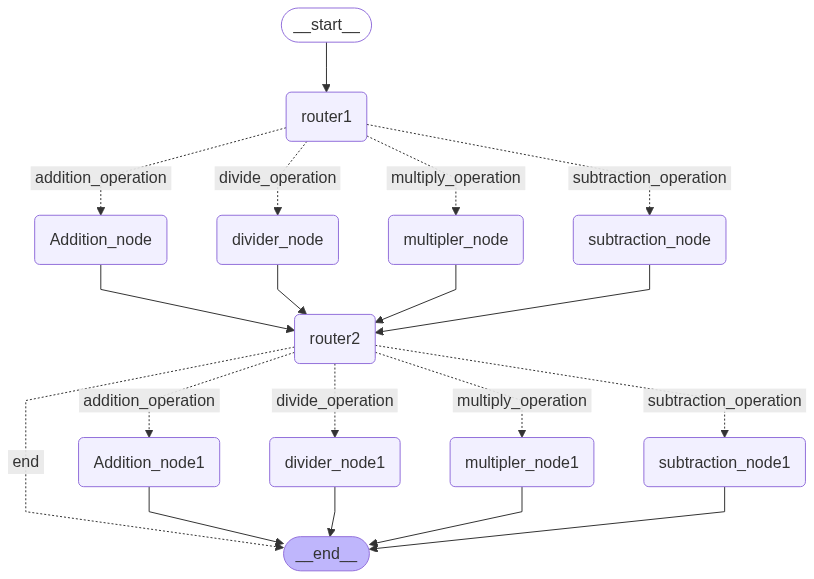

In [190]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [191]:
response = graph.invoke({"num1":5,"num2":14,"operation1":"+","operation2":"-"})
response

{'num1': 5, 'num2': 14, 'operation1': '+', 'operation2': '-', 'finalNum': -9}